# General Notebook BSc Thesis


#### To be able to manipulate root files using python we can import uproot 

In [2]:
import uproot
import numpy as np #math and science package
import scipy as sp #math and science package
import awkward as ak #root files are usuallt awkward arrays 
import matplotlib.pyplot as plt #plot stuff

#### To open the ROOT data file, we use uproot.open(path). Moreover, .keys() show the keys of the file 

In [3]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
file.keys() #Here we can see the keys of the file (index)

['MuonTree_Zmumu;1', 'MuonTree_ZeroBias;1']

#### With file["keyname"], we can access the different keys (trees) and store them as variables. So far I have ZeroBias, which refers to background data (noise) used as a reference, and Zmumu, which includes data from Z $\longrightarrow \mu \mu$ events.

#### Moreover, .show() will print the different elements that the tree includes. If we want to save one of these elements as a variable, we must type .array() at the end. This way we will obtain a variable that contains the numeric data stored as an array. By default the type of the array is awkward array.

#### An awkward array is a type of data that contains elements of different sizes that are too "weird" to be handled using standard numpy arrays.

#### The function ak.flatten will flatten the array, meaning that it will remove one index. For example: say we have the awkward array a=([1,1],[1,4,5,6],[1,4,4]). If we use ak.flatten(a) the result will be (1,1,1,4,5,6,1,4,4). This is important for plotting.

In [4]:
tree=file["MuonTree_Zmumu;1"] #here we assign one of the keys to a variable 
tree.show() #by saying .show we display the list below, where we can see the datasets contained by "tree"

eta = tree["LVL1Muon_eta"].array()
eta=ak.flatten(eta) #these two steps seems to be necessary to get a nice array of data that we can plot

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
muon_pt              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_eta             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_phi             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_e               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_type            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_charge          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_author          | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_quality         | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_passedIDCuts    | std::vector<bool>        | AsJagged(AsDtype('bool'), h...
jTower_et            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
jTower_et_MeV        | std::

##### "Eta ($\eta$)" is a variable called Pseudorapidity and it represents a location of the ATLAS detector. 
#### $\eta$=0 means the particle went up with respect to the collision point and direction of movement, if $\eta$ is big, around 4 or more, then the direction of the produced muon has barely changed with respect to the collision

Wikipedia: https://en.wikipedia.org/wiki/Pseudorapidity

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pseudorapidity_plot.svg/800px-Pseudorapidity_plot.svg.png width=300>
<img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.bnl.gov%2Ftoday%2Fbody_pics%2F2015%2F06%2Fevent_display_run266904-hr.jpg&f=1&nofb=1&ipt=5efb974c4347d361ea100f791f9edc609db7ba627c2d357422afb41f7060f024 width=400>

In [5]:
print(eta) #see the values
type(eta) #see the type

[1.05, -1.39, 1.64, -2.28, 1.12, 2.05, ..., -0.929, -0.602, 0.875, 0.863, 1.96]


awkward.highlevel.Array

#### My first goal is to plot the different data included inside the arrays. Additionally, the idea is to plot ZeroBias and Z $\longrightarrow \mu \mu$ together so they're easy to compare. To plot will include errorbars, legend and other fancy stuff.

#### Also, the quality of the muons is a relevant parameter. Quality states how "nice" is the event. Quality=0 should be the best muons recorded, so we should expect more accurate results if we plot these. To be able to plot only Quality=0 events, I've developed a set of functions that take an array and select only quality 0 events.

#### In the script below we can see the results:


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
muon_pt              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_eta             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_phi             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_e               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_type            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_charge          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_author          | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_quality         | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_passedIDCuts    | std::vector<bool>        | AsJagged(AsDtype('bool'), h...
jTower_et            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
jTower_et_MeV        | std::

100%|██████████| 10000/10000 [00:11<00:00, 841.64it/s]


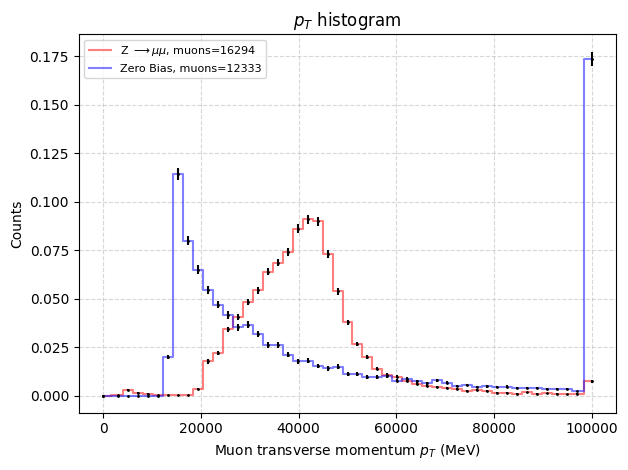

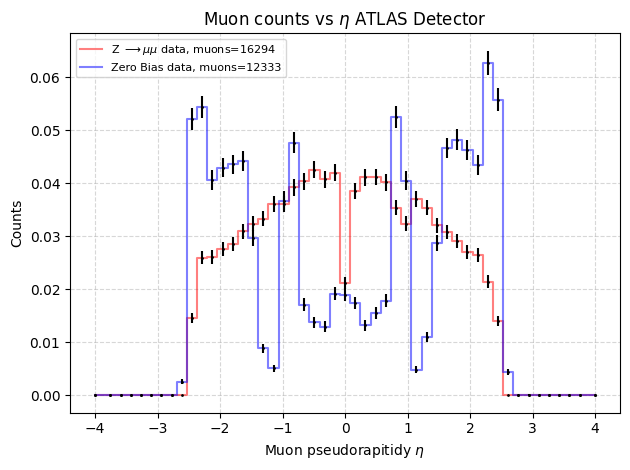

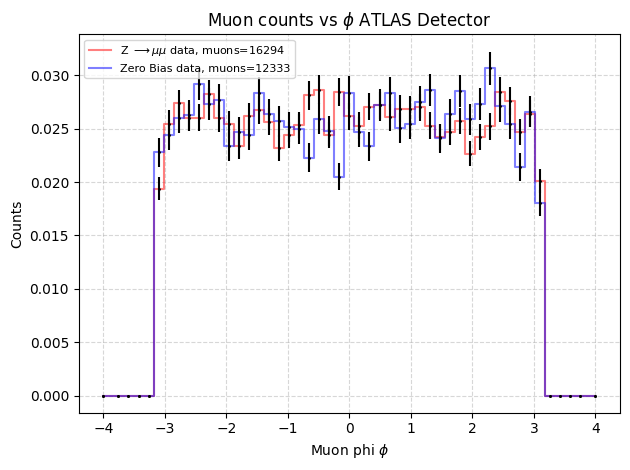

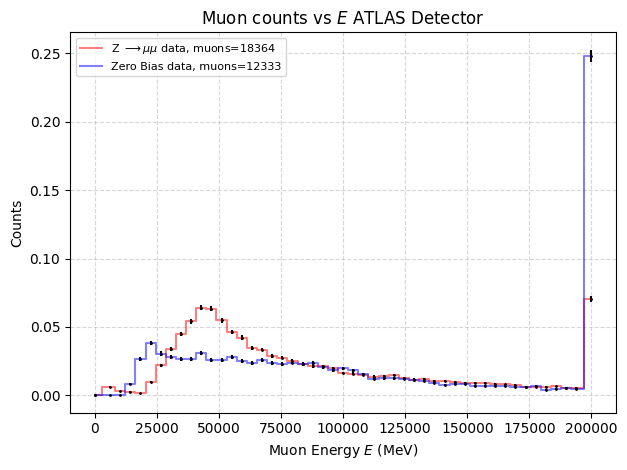

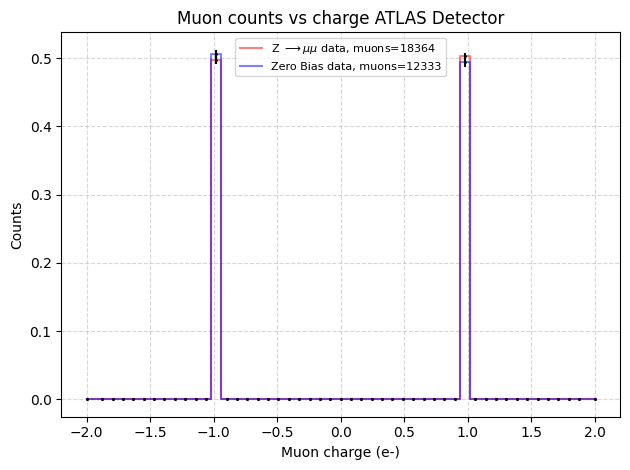

In [1]:
%run programs/all_basic_plots.py

#### Now let's try to extract different information: how many muons are involved in every event (collision)? We aim to create a histogram that relates number of muons per collision in x-axis and counts in y-axis. To do so, I created a function that counts the length of each element.

#### See results:

    1. Function ak_element_lenght_counter(data)
    2. File Number_elements_per_event

#### Let's execute the full scripts to see the results

100%|██████████| 50000/50000 [00:56<00:00, 884.48it/s] 
/home/ruben/Escritorio/BachelorThesisRuben/CodeThesis/programs/number_elements_per_event.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/home/ruben/Escritorio/BachelorThesisRuben/CodeThesis/programs/number_elements_per_event.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


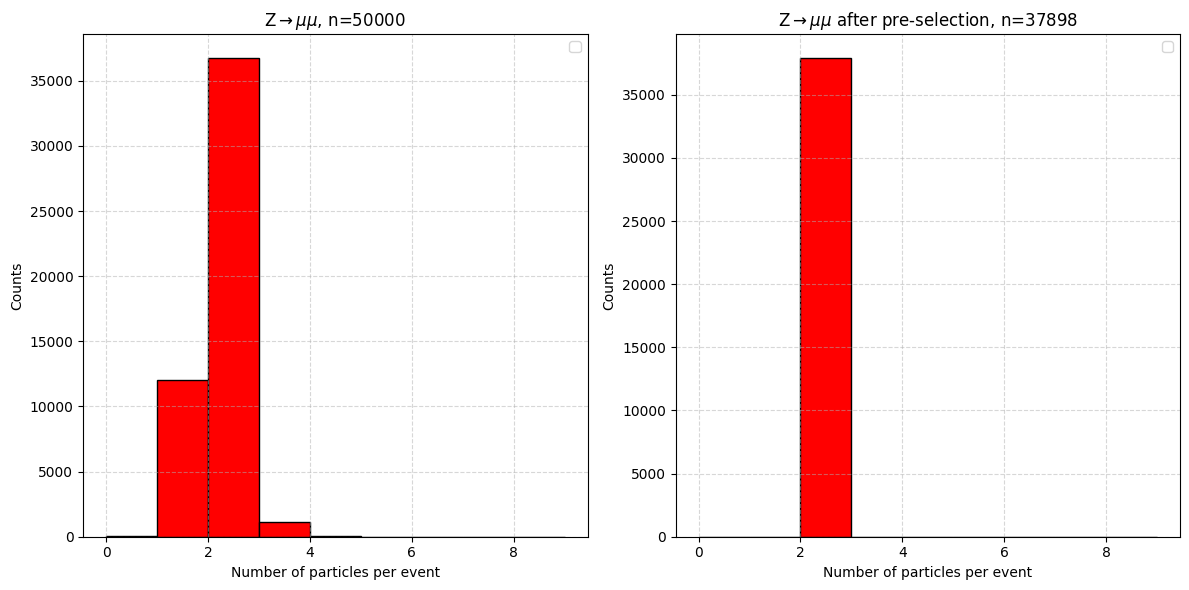

In [7]:
%run programs/number_elements_per_event.py

#### Next goal is to reconstruct the Z boson peak from the data. The idea is that from eta, phi and p_T of the muons we should be able to calculate the invariant mass of the Z boson, which should be arround 90 GeV/c
See: https://en.wikipedia.org/wiki/Invariant_mas

See: https://cds.cern.ch/record/2909648/files/main.pdf

#### First of all, I created a function that plots the Z peak only for events involving two muons. We can see how the results seem to be correct, and how the quality=0 data yields a sharper peak arround the theoretical value. This function has been deleted because I'll create another one that can handle events with more than 2 muons.


#### Now the goal is to extend this function to events with more than 2 elements recorded. This means that the detection systems passed more than 2 muons as possible candidates, however only 2 of them can be the real muons involved. Therefore I had to develop a function that discriminates which pair of muons should we keep.

100%|██████████| 42530/42530 [00:10<00:00, 4233.56it/s]


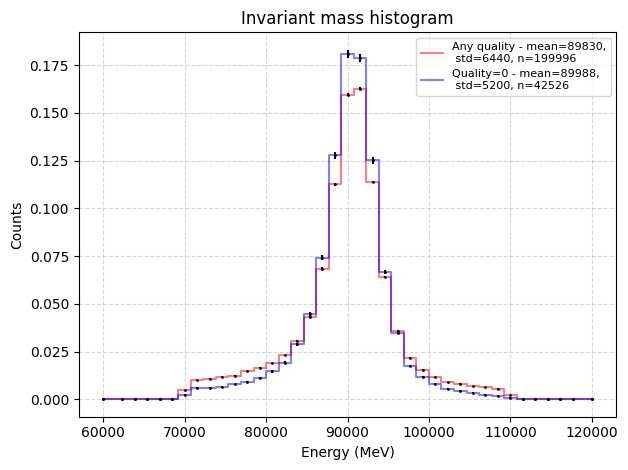

<Figure size 640x480 with 0 Axes>

In [8]:
%run programs/Z_peak_general.py

#### Next thing I've done is to develop the delta_r, delta_eta and delta_phi functions. They compute the "distance" between two muons. The typical values for delta_r are approximately 3 or pi. This seems to be correct since delta_eta is usually small and delta_phi is usually close to pi, because the collisions happen roughly in a plane perpendicular to the beam direction of movement. 

In [9]:
%run programs/delta_r_test.py

The computed delta R values are: [2. 2. 5.]


##### My next task is to implement a function that selects the data that is only above a certain treshold and computes the fraction of data that has been selected. In my case, I want to select the events where muons are above p_T>20000MeV and also multiply this by a scaling factor to get a temportal rate in Hz. My scaling factor is (2340/3564)*40000000. The first term takes into consideration that only 2340 out of 3564 bunches are "filled" (containing protons) when the LHC is running. 40MHz is the bunch crossing rate. So my scaling factor is the filled bunch crossing rate (how many filled bunches collide with each other per second). 

##### It seems like the expected results should be around 10kHz, for Zero Bias muons above 14000MeV

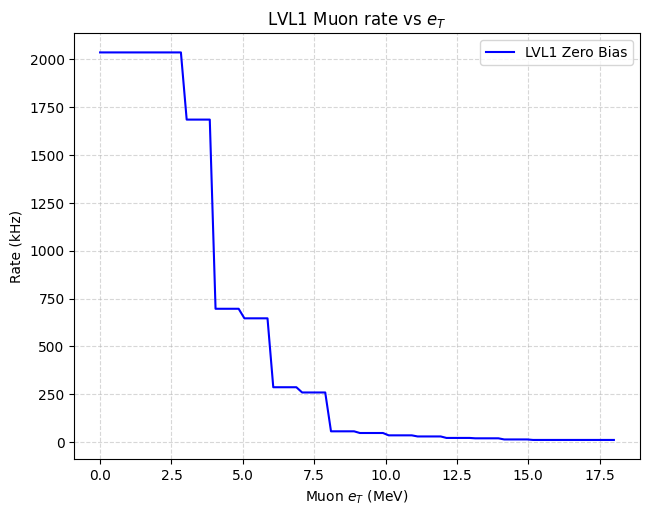

The estimated rate for a threshold of 14000 MeV is 20.616161616161616 kHz. This is 2.0616161616161617 times bigger than the expected value, 10 kHz


In [10]:
%run programs/rate_calculation.py

##### As we can see, I'm running into trouble because the calculated rate is 2 times bigger than the expected one. Don't know why yet.

##### New challenge: plot and understand the jTower data. jTower data refers to the calorimeter "pixels" (a pixel is one little detector), so each entry is the value mesured by a pixel in the ATLAS calorimeter. This data is around 6gb so I can't open it directly with this computer (not enough RAM). What I did is create a function that slices the data in smaller pieces, then calculates a histogram for every piece and at the end adds al histograms togehter. It also plots the histogram if we want. Here're the results: 

Note: the e_T histogram starts at 10⁴. There were so many events at low e_T that the data was not meaningful.

jTower_handler: iterating...: 20it [00:37,  1.90s/it]


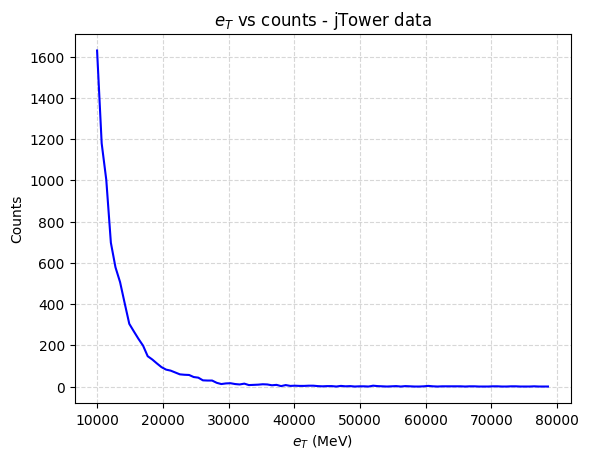

jTower_handler: iterating...: 20it [00:27,  1.39s/it]


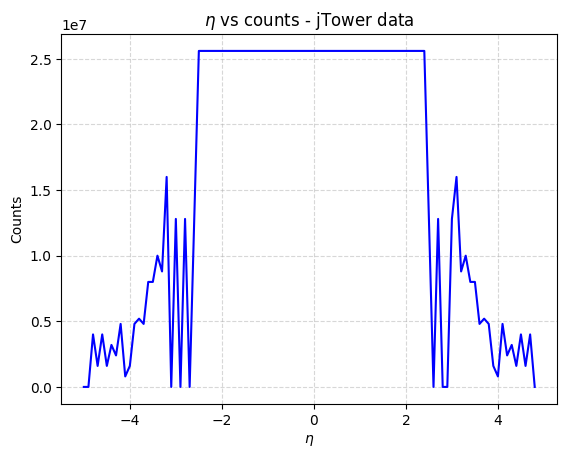

jTower_handler: iterating...: 20it [00:27,  1.40s/it]


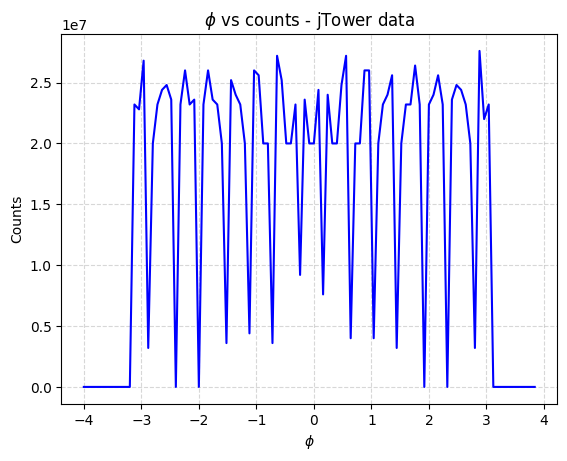

In [11]:
%run programs/jTower_basic_plots.py

##### Now my goal is to "isolate" the muons. To do this, the idea is to compute the delta R between every muon and every calorimeter pixel (jTower elements). To begin with, I'm going to create a function that generates pairs of data so that I can compute the dr between an event an all the jTower pixels. This function is actually integrated inside the final isolation function. Then I want to take into account only the jTower pixels that are actually close to the muons, that's why I need to implement a dr threshold that sets the upper limit for delta r. This takes the jTower pixels that are inside a "cone" of lenght delta r around the muon. Finally I'm going to sum the calorimeter energies that were measured in those selected pixels. This should give a good estimation of the energy of the muon. Then that needs to be repeated for every event. This function perfroms a massive amount of calculations and, even though I've done my best trying to optimise it, it still takes a long time to run. For the ZeroBias data, it takes around 5-10 minutes (because the bast majority of events are empty), but for Z to mu mu data, where no events are empty and each event contains around 1-5 muons typically, the function is taking around 1h to run. Still this is a big improvement, because on my first attempt the function took 24h to run on the ZeroBias data. Let's run below a test using a small sample of the data so it runs in a decent amount of time.




energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


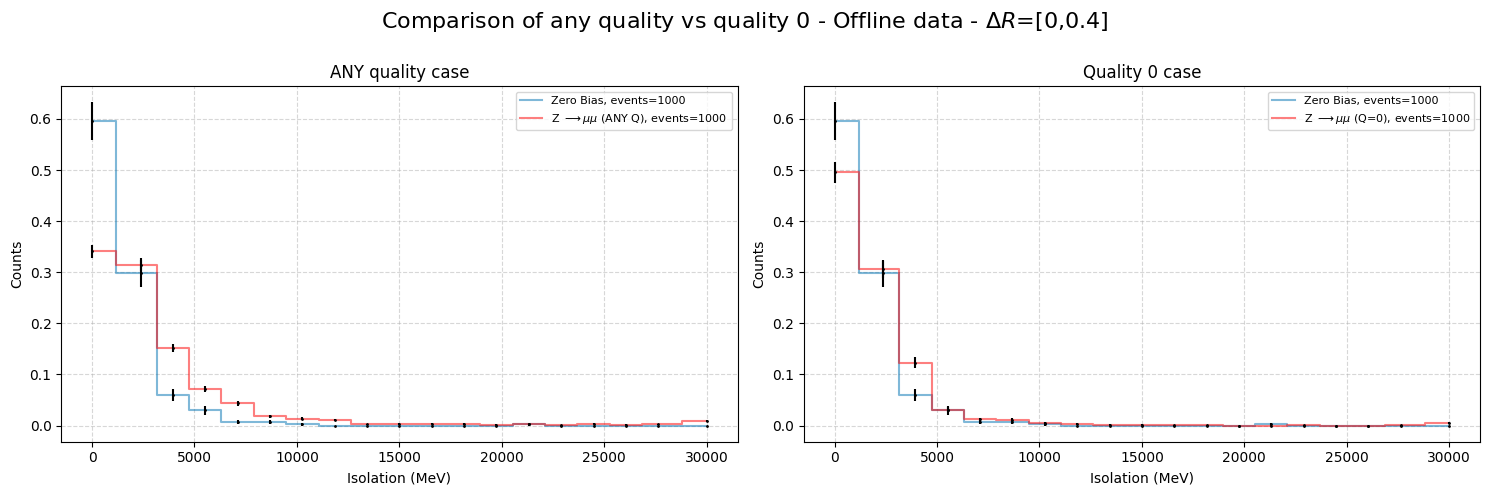

In [12]:
%run programs/jTower_isolation_plots1.py

energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


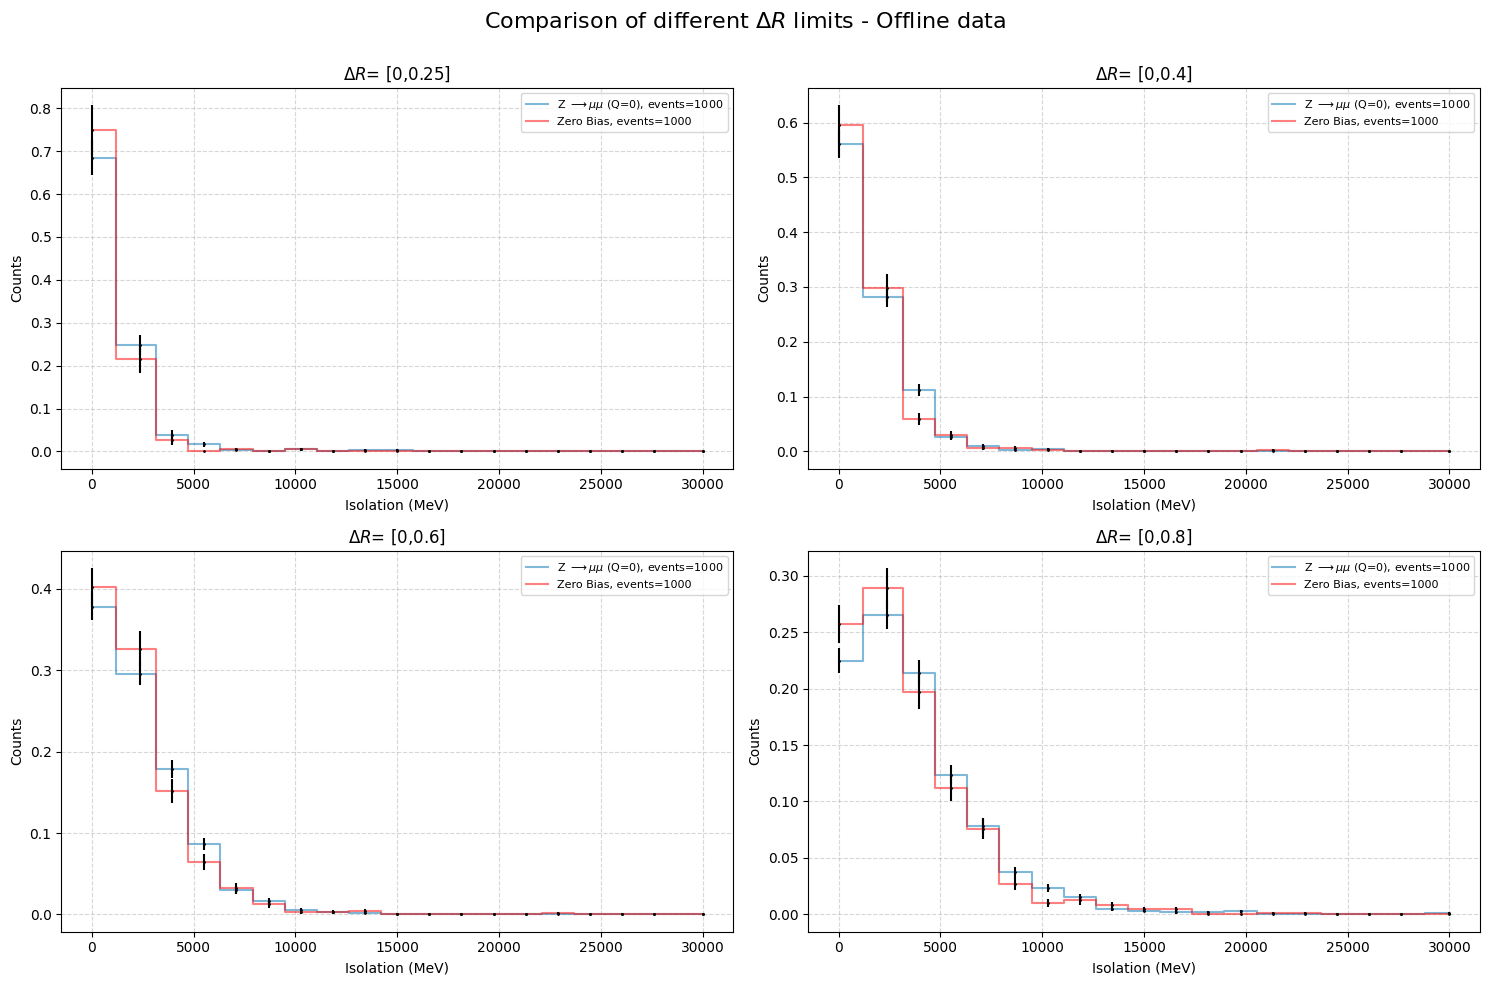

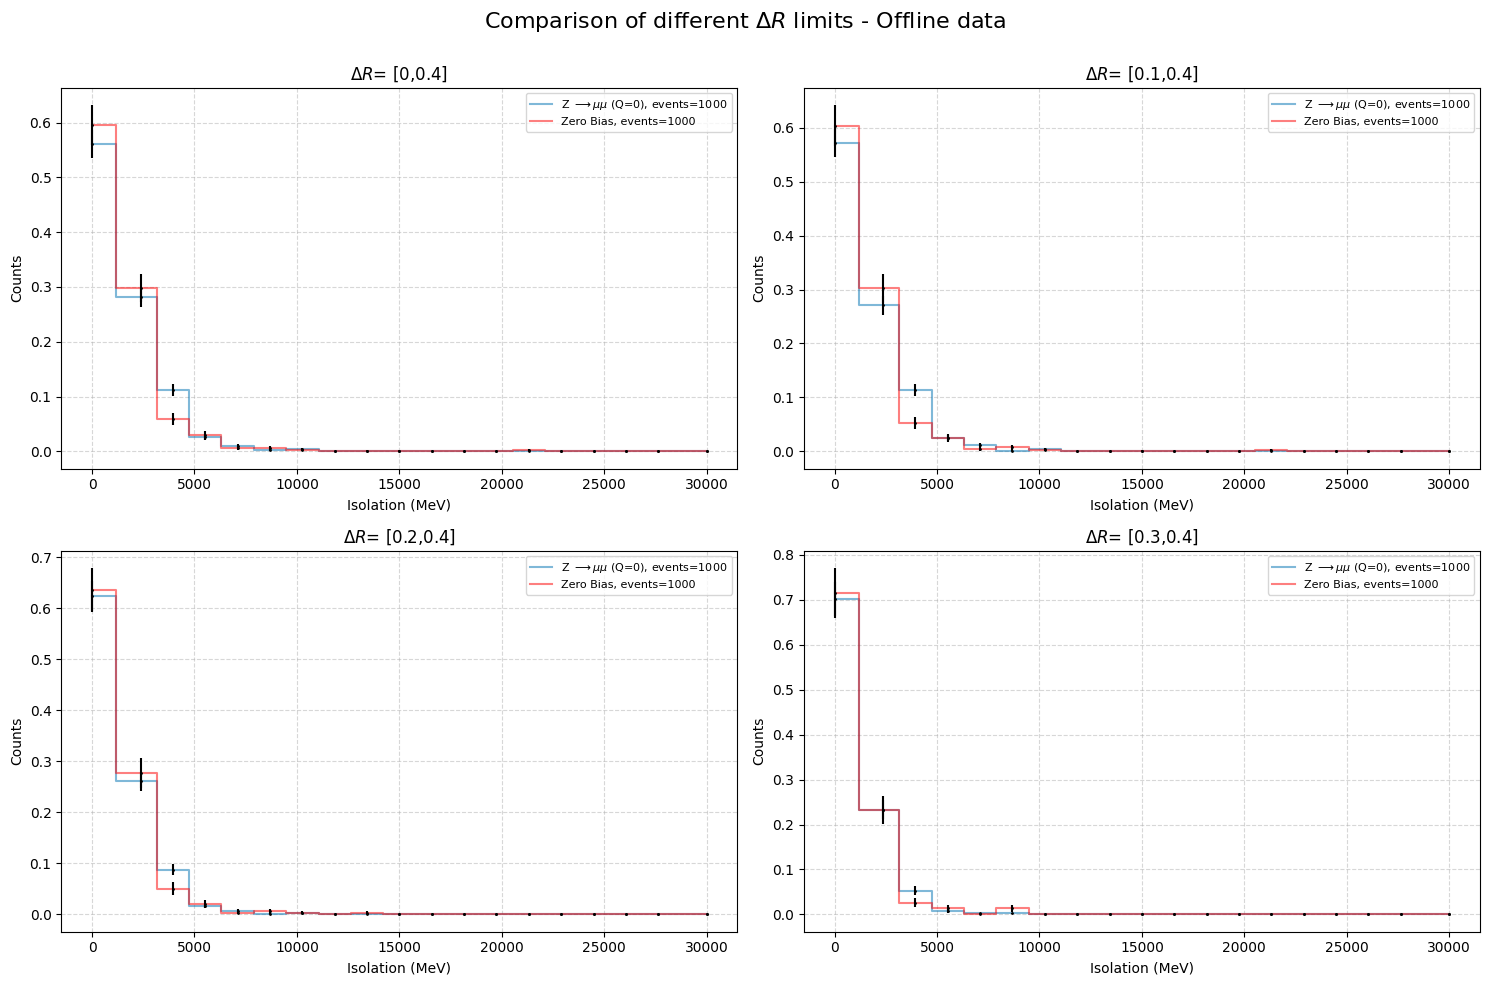

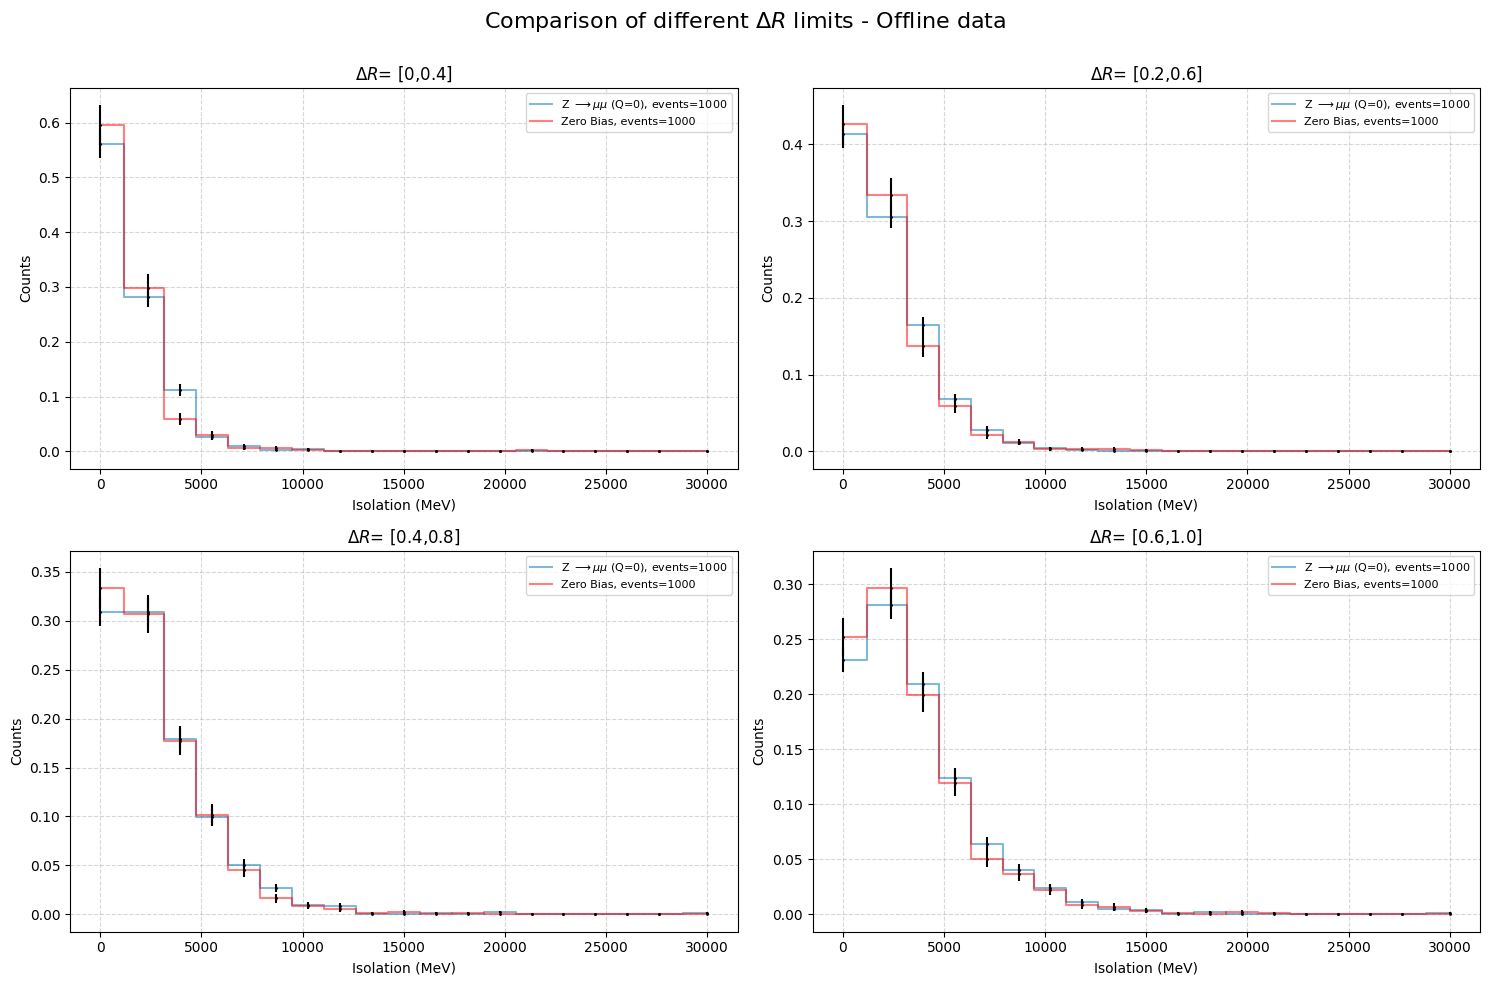

In [13]:
%run programs/jTower_isolation_plots2.py

#### Another useful plot is the ratio of isolation/transverse energy, the idea behind it is to have a "scale-independent" representation of our data. This is straightforward to plot but the results show a fundamental result: even though we were not apprecianting much difference between Zmumu and ZeroBias looking at the plots above, we'll be able to discriminate how most of the ZeroBias data is 'junk' by using the "scale-independent" plots.

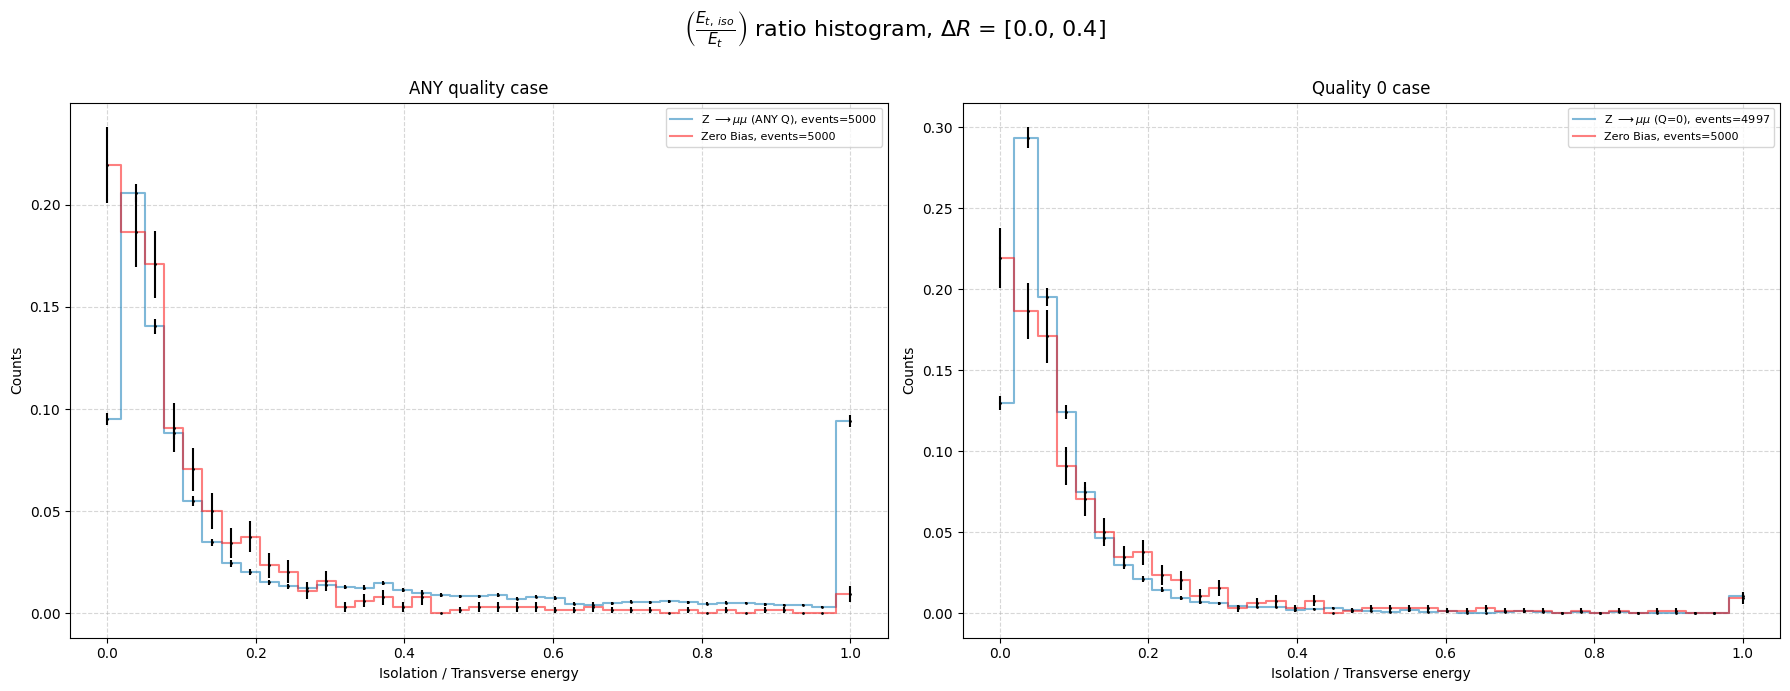

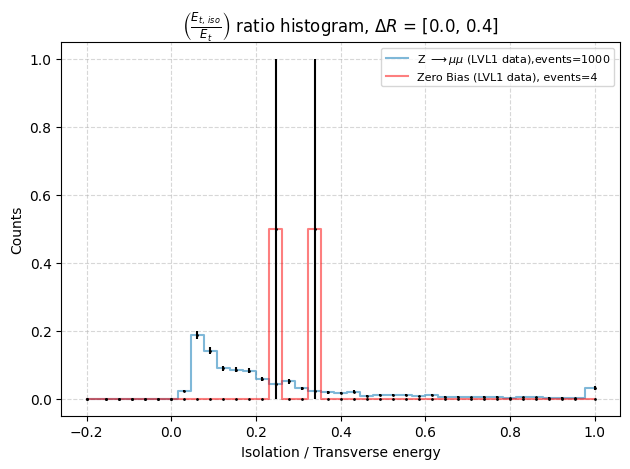

In [14]:
%run programs/jTower_ratio_plots1.py

100%|██████████| 2000/2000 [00:02<00:00, 694.11it/s]


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


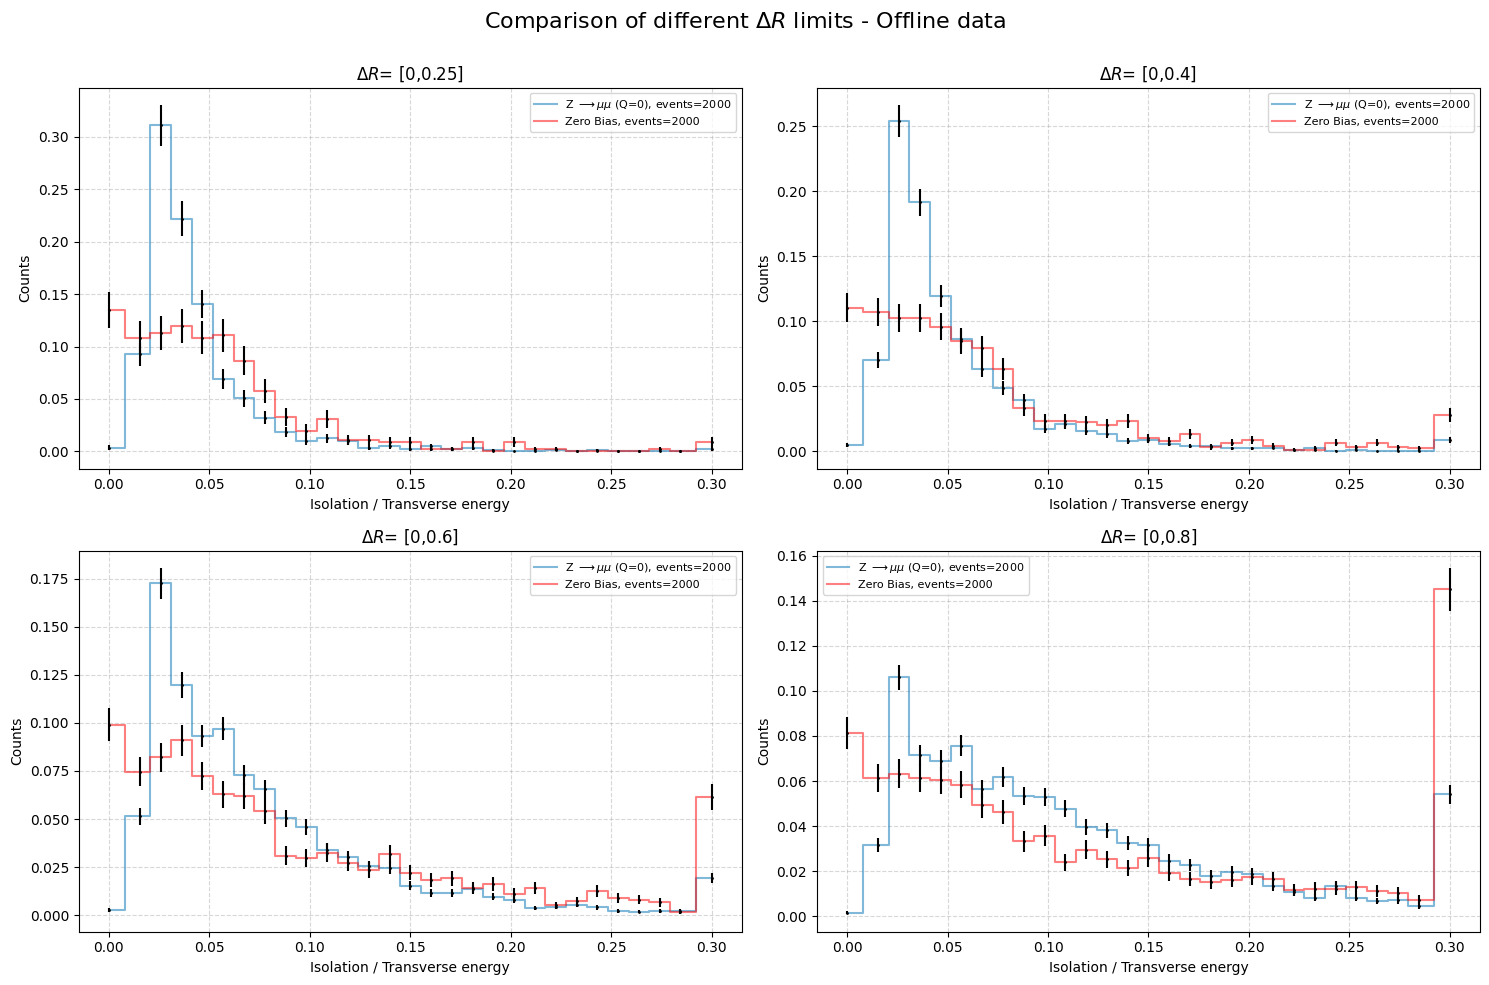

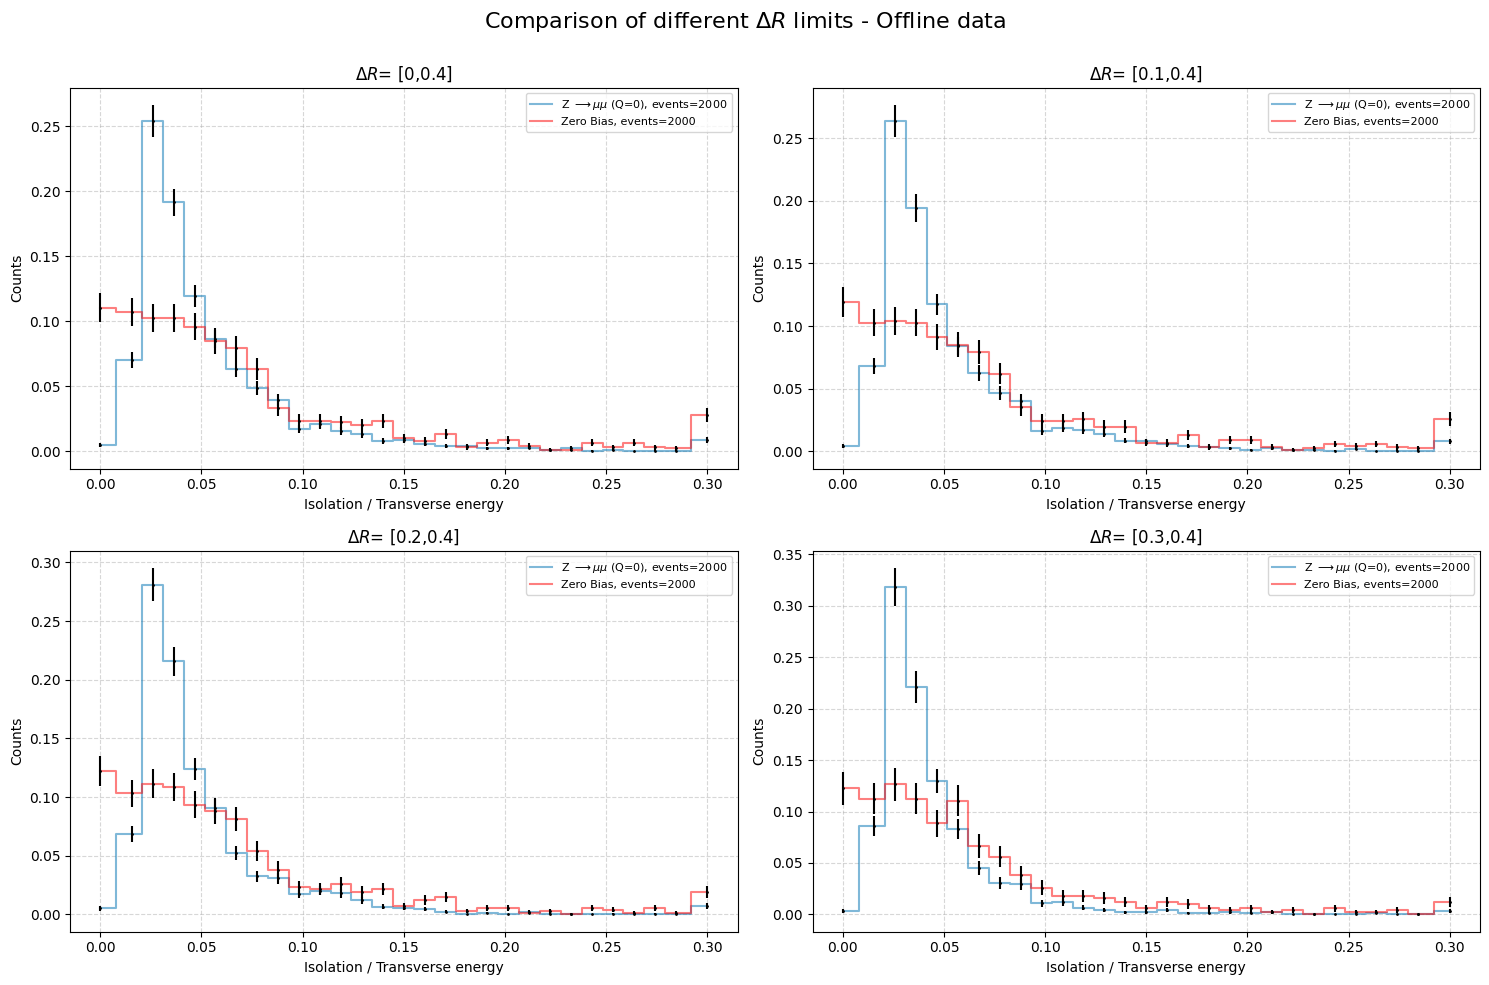

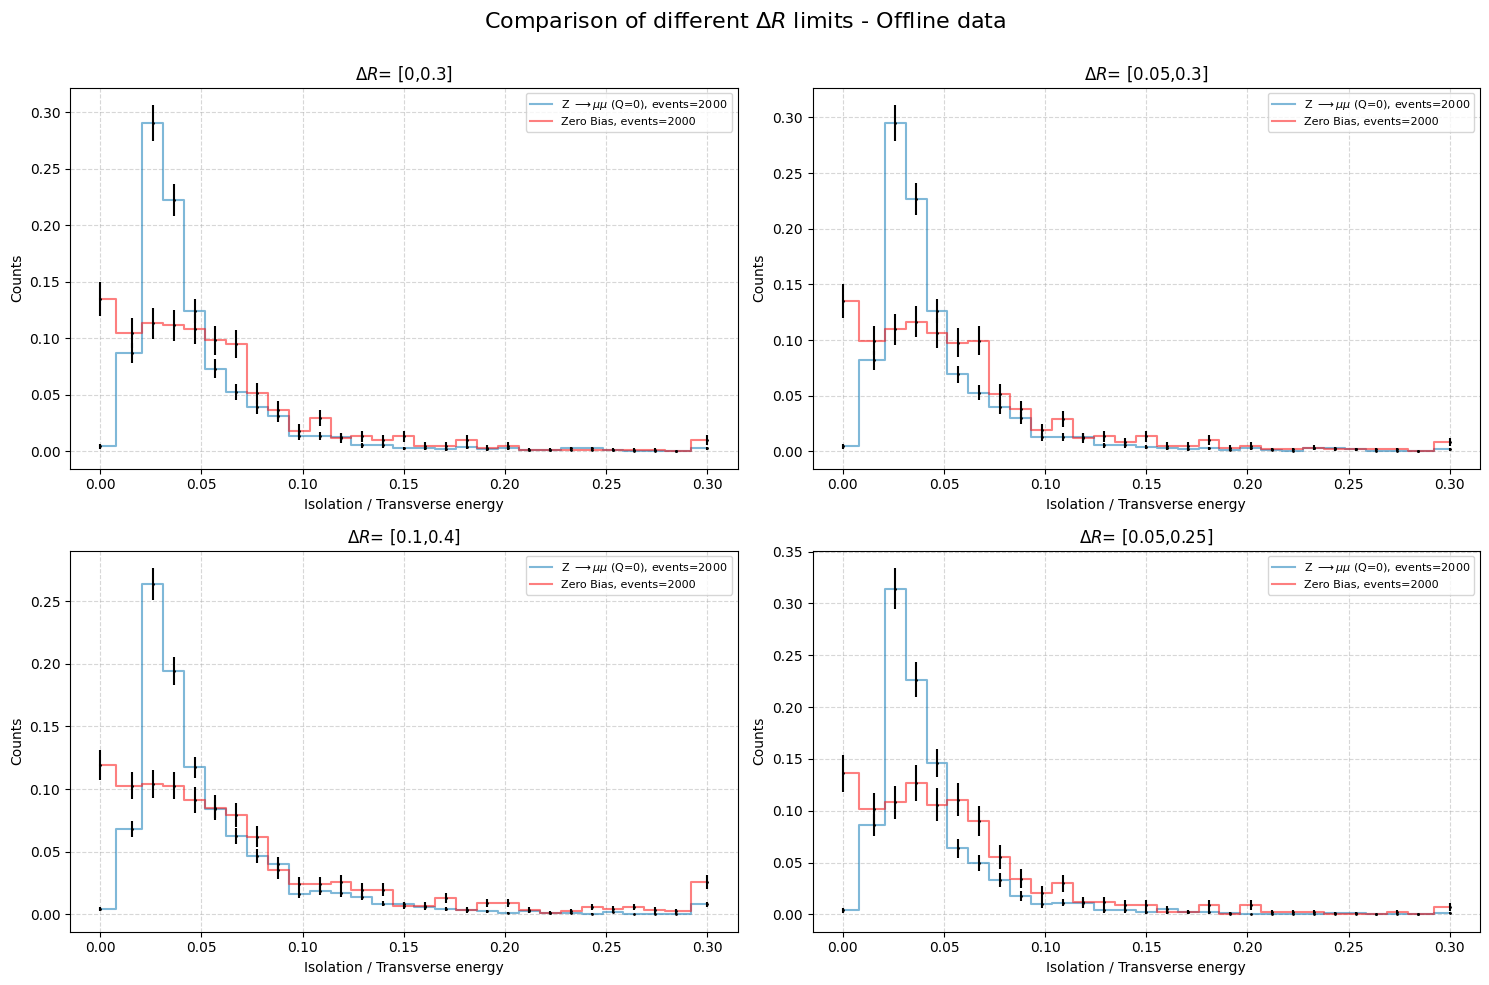

In [15]:
%run programs/jTower_ratio_plots2.py

#### ROC Curve: 1st plot everything but as a ratio, 2nd select a x threshold and compute the ratio of amount of events that remain at the left vs the total, the total should be normalised so thats easy. Scan all x value (for example all bin edges) and that generates a set of points. Plots what happens for Zmumu data (True positve) vs Background data (False positive) 

100%|██████████| 5000/5000 [00:06<00:00, 823.19it/s]


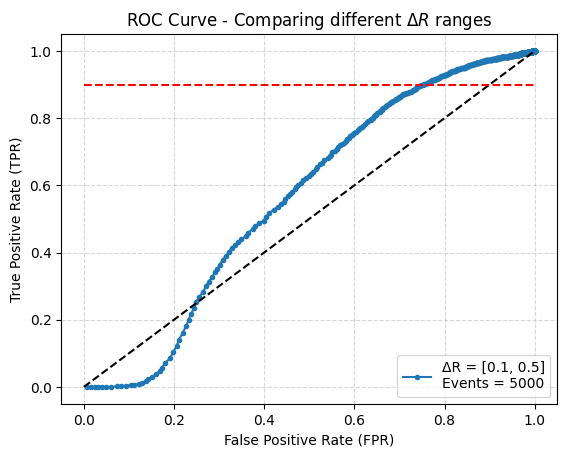

In [1]:
%run programs/jTower_ROC_curve.py

#### 5th of June: I've introduced the energy_cut function because the Zero Bias data doesn't include a lower threshold that the Zmumu data does. To make the comparison fair, we have to introduce this lower threshold (select only event with energy higher than 14GeV) to the Zero Bias data. As a consequence, the huge difference seen between Zmumu and ZeroBias data in my ratio plots has decreased a lot, and I'm going to need a bigger sample for LVL1 ZeroBias data since, after selecting the events, I'm left with only 157 valid events.

Muon isolation optimisations: compute the square of delta R instead of delta R to avoid computing square roots, the threshold is squared instead, and the outcome is the same. Also, I've introduced this block in the isolation_one_event function:

        #Take the jTowers with negative energy out (they appear due to technical features of the detector)
        mask=jTower_et_event > 0
        jTower_et_event=jTower_et_event[mask]
        jTower_eta_event=jTower_eta_event[mask]
        jTower_phi_event=jTower_phi_event[mask]

Instead of filtering out the negative energies after the calculation like before, now I filter them out before, this decreases the number of jTower elements from 7680 to less than 2000.

With this improvements (especially the last one), the function runs x5-x15 times faster depending on the case!!

#### Now, to be more specific, what I'm going to plot is the isolation, the isolation/et ratio and the ROC curve for offline ZeroBias data that has passed the cut (14GeV) and quality 0 Zmumu data that forms the Z peak. For this, I apply the energy_cut function to the ZeroBias data, and the quality_selector, followed by the get_all_Z_peak_pairs to the Zmumu data. 

In [1]:
from my_functions import * 
file=uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root")

%run programs/jTower_cut_Z_pairs_plots.py

100%|██████████| 10000/10000 [00:13<00:00, 728.16it/s]


KeyboardInterrupt: 

#### Now I should try to optimise the delta R parameters so I get the 'best' ROC curve. A good estimator is to minimise the distance between the curve and the top left corner. To do so, I can compute the distance for all points and try to minimise it by adding small variations to an initial guess of delta R.


#### Results: defining what i want is not so easy: the optimisation functions keep doing 'tricks' like making the delta R window very narrow, and therefore eliminating many points, which reduces the distance, I'm going to approach the problem in a different way.  

#### New approach (recommended): set an efficiency goal, for example 90% (that means the x point where the y value is 0.9), and try to make the x value as small as possible, manually. Parameters that I could change is the delta R range and also maybe apply windows to the ratios, because we can see there are 3 regions in my ratio plot: one for low ratio (around 0.1) where ZeroBias is dominant, one intermediate where Zmumu is dominant, and the high ratio region where ZeroBias is dominant again. Choosing only intermediate events may help.

After 2000 iterations, the best delta R range is: [np.float64(0.31017218286822285), np.float64(0.5819628446371183)] with an FPR of 0.7647058823529411


#### I've been working recently on applying "noise cuts" as an attempt to improve the results. This noise cuts are the minimum jTower energies that I accept, if the value is smaller than that, I set it to 0. The value of the cut depends on jTower eta and jTower calosource (electromagnetic is calosource is 0 or even (EM), hardonic if it's odd (HAD)). To achieve this, I created a function that applies a double mask. See: jTower_assign_cuts 

#### To understand better what's going on with the isolation, I'm plotting a scatterplot (heatmap) with transverse energy in one axis and isolation ratio in the other:

In [ ]:
%run programs/et_ratio_plot.py

/home/ruben/Escritorio/BachelorThesisRuben/CodeThesis/programs/et_ratio_plot.py:38: SyntaxWarning: invalid escape sequence '\m'
  """
100%|██████████| 10000/10000 [00:11<00:00, 856.35it/s]
muon_isolation_all_events: Computing muon isolation:  50%|█████     | 5/10 [00:13<00:13,  2.70s/it]

#### We can see how ZeroBias muons with low ratio are mostly located at the high transverse energy area. I'll select these muons and plot a histogram of their pt, eta and phi to see if there's anything interesting

In [ ]:
%run programs/plot_any_vs_low_ratio.py

#### We can see how low ratio ZeroBias muons indeed have higher transverse energies, but nothing else catches my attention.

#### Another idea: set a fix efficiency (TPR) for example 90% (0.9) and plot how the position of the FPR(90%) moves as a function of delta R.

In [ ]:
%run programs/plot_FPR_vs_dr.py

#### Now i'll add a scaling factor to the noise cut values and see if there's any impact on the isolations, just to understand better whats going on.

In [ ]:
%run programs/ROC_curve_vs_scaling.py

#### I've been running some tests and, as we can see in the ROC curve plots, at the beggining our plot is always below the f(x)=x line. That means we are being very inefficient in this region. This also makes sense looking at the ratio plots because the ZeroBias data values are much higher than the Zmumu values at the very beggining of the plot, if we removed that are (for example setting a low limit of ratio=0.02), then the ROC curve would look much better in that region. Obviously this can't be done without a reason ,so it would be nice to find out what's going on and if there's some justification. I've examined the eta, phi and pt values of the ZeroBias muons in that are and nothing seems out of place. See the results:

In [ ]:
%run programs/ROC_curve_removing_first_bins.py

I've created an easier visalization of the FPR(90%) for different choices of delta R.

In [ ]:
%run programs/2D_ROC_optimizer.py

#### Try computing the isolation but substracting 5GeV to the result. If the energy gets negative, set it to 0. 

In [ ]:
%run programs/isolation_substracting_5GeV.py

#### Analysis: we see how the majority of events are now set to 0. As a consequence, the scale of the plot doesn't allow us to see the distribution. A solution (?) is to plot only values bigger than 0. We see how now both distributions are more similar (that's good?) however I'm low on statistics.

## I've developed an automated optimization of delta R:

In [ ]:
%run programs/automated_2D_optimizer.py

## 1/7/25: Important bug fixed

I substituted the energy_cut and quality_selector functions for energy_cut_with_empty and quality_selector_with_empty. The muon indices and jTower indices were not matching (see presentation for week 8)

Modified programs:
1. automated_2D_optimizer
2. plot_any_vs_All_low_ratio
3. et_ratio_plot
4. ROC_curve_vs_scaling
5. ROC_curve_removing_first_bins
6. other_dataset_plots
7. all_basic_plots

#### Added upper cut of 50 MeV, new best results are delta R=[0.12, 0.92] with FPR90=0.623.

## To do list
1. Take into account charge for Z peak selection
2. Errorbars for ROC
3.  2D  FPR90 different sclaings
4. Try more different cones
5. Re-do plots and show them tomorrow
6. Check source of Zero Bias 



For tomorrow - plots done:

ROC curve vs scaling